In [1]:
import numpy as np
import matplotlib
import pylab as plt
import pandas as pd
%matplotlib inline

In [2]:
pd.read_csv?

In [3]:
def ReadFile(filename,toprange=700):

    #dat=pd.read_excel("./RLM_06232022_Angle Study 18c6.xlsx",engine='openpyxl')
    dat=pd.read_csv(filename,nrows=327)
    renamemapper={}
    for i in range(0,len(dat.columns)-1):
        renamemapper[dat.columns[i+1]]=dat.columns[i]
    renamemapper[dat.columns[0]]="Wavelength"
    DataList={}
    DataMatrix=[]
    prev=0
    subfr=dat.iloc[:,np.concatenate([[0],np.arange(1,len(dat.columns),2)])]
    subfr=subfr.rename(renamemapper,axis=1).iloc[1:toprange].astype(float)
    for i in subfr.columns:

        X=i.split("_")
        if(len(X)>1):
            DataList[float(X[-1])]=subfr[i]
            DataMatrix.append(np.array(subfr[i]))
            
        prev=i


    return subfr, DataList,DataMatrix

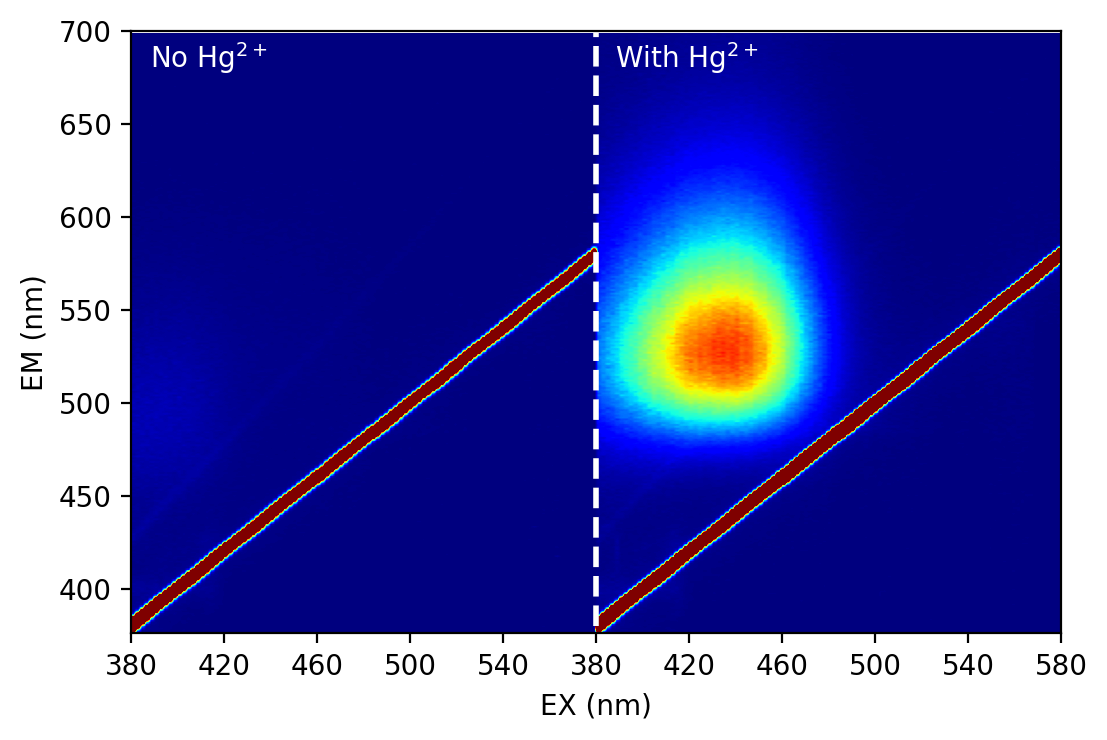

In [4]:
subfr_Ba,DataList_Ba,DataMatrix_Ba=ReadFile("./Data/OFF_ON Hg 3D.csv")



plt.figure(figsize=(6,4),dpi=200)
plt.imshow(np.transpose(np.array(DataMatrix_Ba)),extent=(0,10,np.min(subfr_Ba.Wavelength),np.max(subfr_Ba.Wavelength)),origin='lower',cmap='jet',vmax=130,vmin=0,aspect=1/50)
#plt.colorbar()
plt.ylabel("EM (nm)")
plt.xlabel("EX (nm)")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],[380,420,460,500,540,380,420,460,500,540,580])
plt.text(0.2,680,r"No Hg$^{2+}$",color='white')

plt.text(5.2,680,r"With Hg$^{2+}$",color='white')
plt.plot([5,5],[380,700],'--',color='white',linewidth=2)
plt.savefig("Figs/Figure5_3D.png",dpi=150,bbox_inches='tight')